In [41]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [42]:
X_orig = np.load('../../data/processed_data/specgram_db_pad_trunc.npy')

X_specaug1 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask1.npy')
X_tsh1 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift1.npy')
X_randn1 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise1.npy')
X_tstr1 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch1.npy')

X_specaug2 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask2.npy')
X_tsh2 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift2.npy')
X_randn2 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise2.npy')
X_tstr2 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch2.npy')

X_specaug3 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask3.npy')
X_tsh3 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift3.npy')
X_randn3 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise3.npy')
X_tstr3 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch3.npy')

print(X_orig.shape)

(440, 128, 67)


In [43]:
#choose what to add to the orignal data
X = np.concatenate((X_orig,X_randn1), axis=0)
#X = np.concatenate((X,X_tsh1), axis=0)
print(X.shape)

df = pd.read_csv("../../data/processed_data/metadata.csv")
y_orig = df['sex'].values
y = np.concatenate((y_orig, y_orig), axis=0)
print(y.shape)

(880, 128, 67)
(880,)


In [44]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(880, 128, 67, 1)


In [45]:
def plottv(history_dict,epochs):
    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()


    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [47]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 2.2866 - accuracy: 0.2985 - val_loss: 54.8075 - val_accuracy: 0.7957
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 56.4332 - accuracy: 0.7825 - val_loss: 26.9444 - val_accuracy: 0.7957
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 27.7189 - accuracy: 0.7825 - val_loss: 6.5038 - val_accuracy: 0.7957
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 6.6905 - accuracy: 0.7825 - val_loss: 2.5578 - val_accuracy: 0.2043
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 2.4539 - accuracy: 0.2175 - val_loss: 0.5663 - val_accuracy: 0.7574
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.5467 - accuracy: 0.7740 - val_loss: 0.5960 - val_accuracy: 0.7957
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.5985 - accuracy: 0.7868 - val_loss: 0.5438 - val_accuracy: 0.7957
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 3s 3s/step - loss: 0.0273 - accuracy: 0.9979 - val_loss: 0.3329 - val_accuracy: 0.9277
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.0244 - accuracy: 0.9979 - val_loss: 0.3386 - val_accuracy: 0.9319
Epoch 62/100
1/1 [==============================] - 4s 4s/step - loss: 0.0225 - accuracy: 0.9979 - val_loss: 0.3406 - val_accuracy: 0.9319
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.0203 - accuracy: 0.9979 - val_loss: 0.3421 - val_accuracy: 0.9319
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.0187 - accuracy: 0.9979 - val_loss: 0.3404 - val_accuracy: 0.9319
Epoch 65/100
1/1 [==============================] - 4s 4s/step - loss: 0.0172 - accuracy: 0.9979 - val_loss: 0.3364 - val_accuracy: 0.9319
Epoch 66/100
1/1 [==============================] - 3s 3s/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.3347 - val_accuracy: 0.9319
Epoch 67/100
1/1 [=========

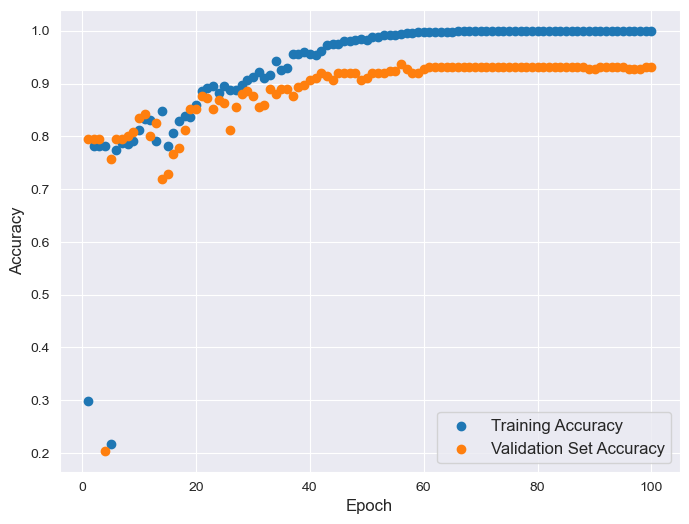

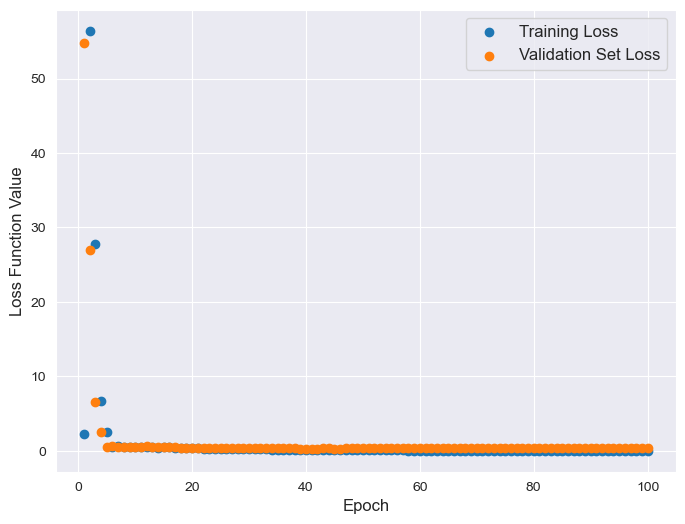

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.0059 - accuracy: 0.7846 - val_loss: 205.2130 - val_accuracy: 0.2085
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 195.3998 - accuracy: 0.2154 - val_loss: 15.6472 - val_accuracy: 0.2085
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 14.7922 - accuracy: 0.2154 - val_loss: 9.5205 - val_accuracy: 0.7915
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 10.3046 - accuracy: 0.7846 - val_loss: 6.2267 - val_accuracy: 0.7915
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 6.6974 - accuracy: 0.7846 - val_loss: 3.0502 - val_accuracy: 0.7915
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 3.2263 - accuracy: 0.7846 - val_loss: 0.9929 - val_accuracy: 0.7915
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 1.0014 - accuracy: 0.7846 - val_loss: 0.5987 - val_accuracy: 0.7915
Epoch 8/100
1/1 [==========

Epoch 60/100
1/1 [==============================] - 4s 4s/step - loss: 0.0322 - accuracy: 0.9936 - val_loss: 0.4053 - val_accuracy: 0.9404
Epoch 61/100
1/1 [==============================] - 4s 4s/step - loss: 0.0279 - accuracy: 0.9936 - val_loss: 0.3876 - val_accuracy: 0.9362
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.0259 - accuracy: 0.9979 - val_loss: 0.3947 - val_accuracy: 0.9404
Epoch 63/100
1/1 [==============================] - 4s 4s/step - loss: 0.0219 - accuracy: 0.9957 - val_loss: 0.4196 - val_accuracy: 0.9404
Epoch 64/100
1/1 [==============================] - 4s 4s/step - loss: 0.0209 - accuracy: 0.9979 - val_loss: 0.4049 - val_accuracy: 0.9404
Epoch 65/100
1/1 [==============================] - 4s 4s/step - loss: 0.0179 - accuracy: 0.9979 - val_loss: 0.3921 - val_accuracy: 0.9404
Epoch 66/100
1/1 [==============================] - 4s 4s/step - loss: 0.0170 - accuracy: 0.9979 - val_loss: 0.4079 - val_accuracy: 0.9404
Epoch 67/100
1/1 [=========

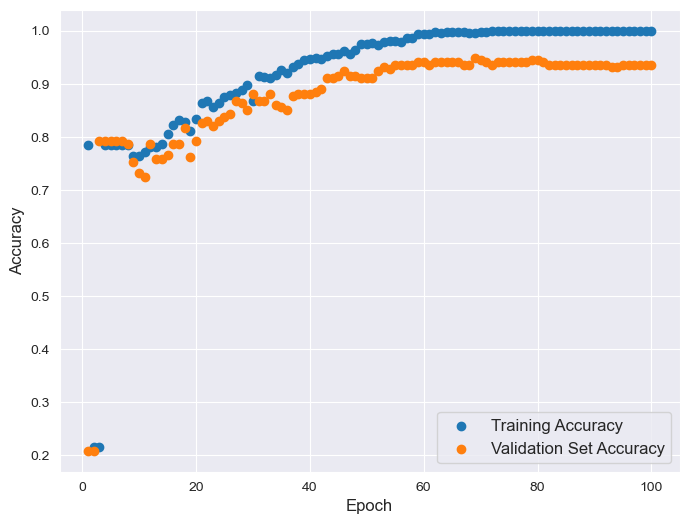

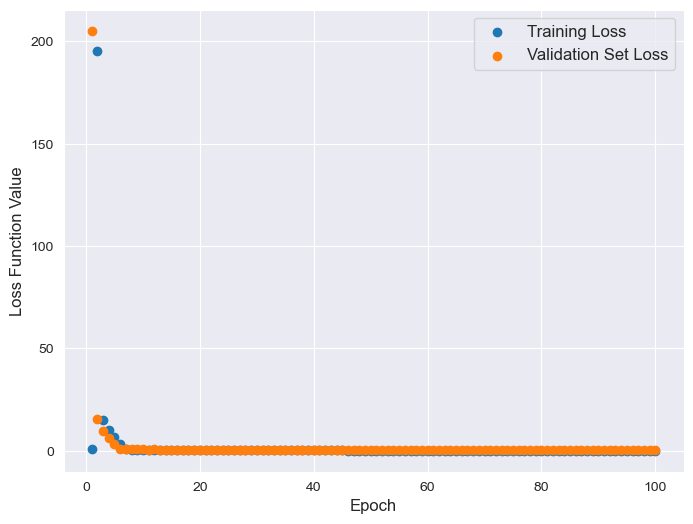

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 6.3469 - accuracy: 0.2064 - val_loss: 42.1304 - val_accuracy: 0.7735
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 37.8459 - accuracy: 0.7936 - val_loss: 19.7953 - val_accuracy: 0.7735
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 17.7773 - accuracy: 0.7936 - val_loss: 3.9520 - val_accuracy: 0.7735
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 3.5093 - accuracy: 0.7936 - val_loss: 15.4269 - val_accuracy: 0.2265
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 16.0606 - accuracy: 0.2064 - val_loss: 2.4093 - val_accuracy: 0.2265
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 2.5065 - accuracy: 0.2064 - val_loss: 2.2487 - val_accuracy: 0.7735
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 1.9902 - accuracy: 0.7936 - val_loss: 1.9008 - val_accuracy: 0.7735
Epoch 8/100
1/1 [===========

Epoch 60/100
1/1 [==============================] - 4s 4s/step - loss: 0.0586 - accuracy: 0.9872 - val_loss: 0.2398 - val_accuracy: 0.9188
Epoch 61/100
1/1 [==============================] - 4s 4s/step - loss: 0.0537 - accuracy: 0.9872 - val_loss: 0.2360 - val_accuracy: 0.9231
Epoch 62/100
1/1 [==============================] - 4s 4s/step - loss: 0.0490 - accuracy: 0.9915 - val_loss: 0.2327 - val_accuracy: 0.9188
Epoch 63/100
1/1 [==============================] - 4s 4s/step - loss: 0.0464 - accuracy: 0.9915 - val_loss: 0.2302 - val_accuracy: 0.9359
Epoch 64/100
1/1 [==============================] - 4s 4s/step - loss: 0.0414 - accuracy: 0.9915 - val_loss: 0.2342 - val_accuracy: 0.9274
Epoch 65/100
1/1 [==============================] - 4s 4s/step - loss: 0.0386 - accuracy: 0.9915 - val_loss: 0.2492 - val_accuracy: 0.9274
Epoch 66/100
1/1 [==============================] - 4s 4s/step - loss: 0.0361 - accuracy: 0.9915 - val_loss: 0.2487 - val_accuracy: 0.9316
Epoch 67/100
1/1 [=========

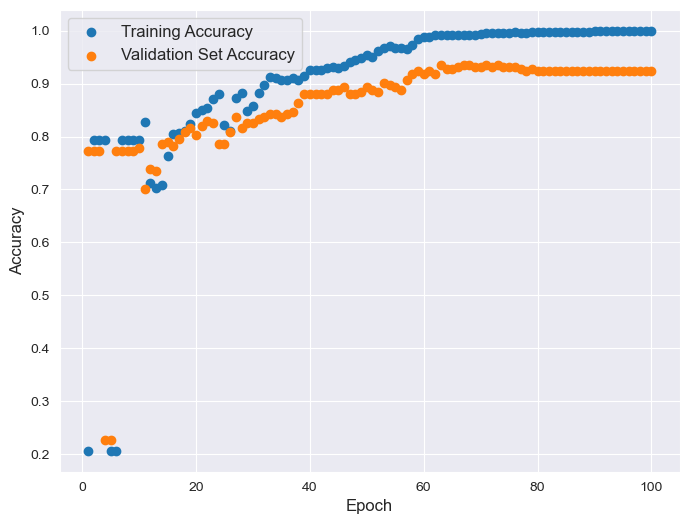

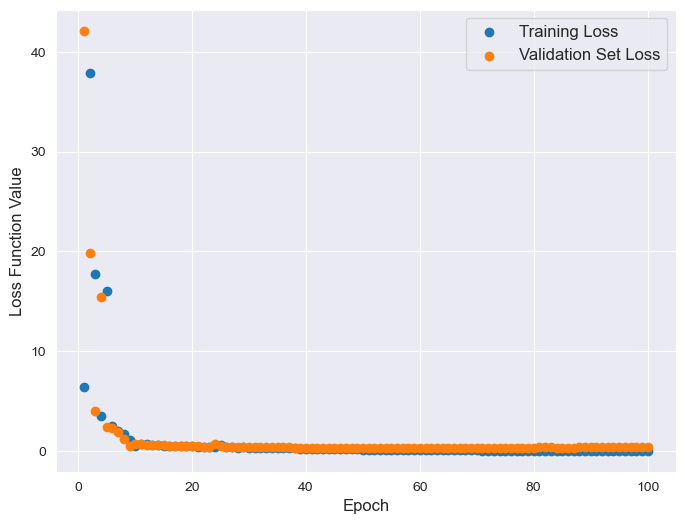

In [48]:
## Cross Validation folds
kfold = StratifiedKFold(3,
                        shuffle=True,
                        random_state=846)
epochs=100

for train_index, test_index in kfold.split(X_train,y_train):
    
    X_tt, X_val = X[train_index], X[test_index]
    y_tt, y_val = y[train_index], y[test_index]
    
    model = models.Sequential()
    model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
    model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
    model.add( layers.Conv2D(64, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides=2) )
    #model.add( layers.Conv2D(128, (6,3), activation='relu'))
    #model.add( layers.MaxPooling2D( (4,2), strides=2) )
    
    
    model.add( layers.Flatten() )
    model.add(layers.Dense(45, activation='relu'))

    ## Finally an output layer
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_tt, 
                          to_categorical(y_tt), 
                          epochs=epochs, 
                          batch_size=len(y_tt),
                          validation_data=(X_val,to_categorical(y_val)))
    history_dict = history.history
    plottv(history_dict,epochs)

In [51]:
epochs = 60 ##earlier stop, observed from Cross validation

model = models.Sequential()
model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
model.add( layers.Conv2D(64, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
#model.add( layers.Conv2D(96, (6,4), activation='relu'))
#model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
model.add( layers.Flatten() )
model.add(layers.Dense(45, activation='relu'))

## Finally an output layer
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, 
                    to_categorical(y_train), 
                    epochs=epochs, 
                    batch_size=len(y_train)
                    )
#history_dict = history.history
#plottv(history_dict,epochs)

Epoch 1/60
1/1 [==============================] - 2s 2s/step - loss: 1.6482 - accuracy: 0.7812
Epoch 2/60
1/1 [==============================] - 2s 2s/step - loss: 237.1340 - accuracy: 0.2159
Epoch 3/60
1/1 [==============================] - 2s 2s/step - loss: 55.2383 - accuracy: 0.2159
Epoch 4/60
1/1 [==============================] - 2s 2s/step - loss: 1.2120 - accuracy: 0.7841
Epoch 5/60
1/1 [==============================] - 2s 2s/step - loss: 0.8310 - accuracy: 0.7841
Epoch 6/60
1/1 [==============================] - 2s 2s/step - loss: 0.5288 - accuracy: 0.7841
Epoch 7/60
1/1 [==============================] - 2s 2s/step - loss: 0.5634 - accuracy: 0.7841
Epoch 8/60
1/1 [==============================] - 2s 2s/step - loss: 0.5733 - accuracy: 0.7841
Epoch 9/60
1/1 [==============================] - 2s 2s/step - loss: 0.5716 - accuracy: 0.7841
Epoch 10/60
1/1 [==============================] - 2s 2s/step - loss: 0.5452 - accuracy: 0.7841
Epoch 11/60
1/1 [=============================

In [52]:
model.evaluate(X_test,to_categorical(y_test))

6/6 [==============================] - 0s 20ms/step - loss: 0.2093 - accuracy: 0.9318


[0.20934762060642242, 0.9318181872367859]

In [53]:
predictions = model.predict(X_test)

6/6 [==============================] - 0s 19ms/step


In [54]:
predicted_categ = np.argmax(predictions, axis=1)

# 'predicted_labels' now contains the predicted class indices for each sample
print(predicted_categ)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1]


In [55]:
predicted_categ-y_test


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [56]:
model.save("/Users/jinjingyi/meow/meow-by-meow/data/trained_models/CNN/CNN_dataaug_with_1freqtime_masking_gender.keras")